In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [12]:
df = pd.read_csv('fcc-forum-pageviews.csv',
                index_col='date',
                parse_dates=['date'])
df.shape

(1304, 1)

In [13]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [14]:
df = df[(df['value'] <= df['value'].quantile(0.975)) & (df['value'] >= df['value'].quantile(0.025))]
df.shape

(1238, 1)

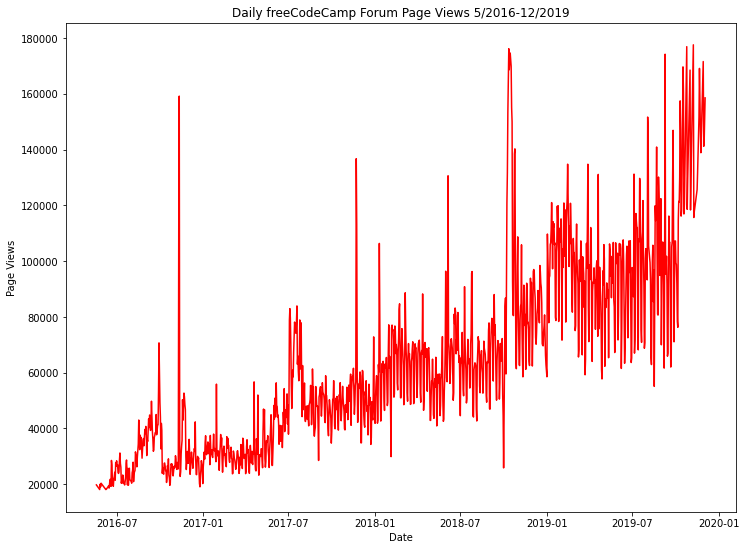

In [19]:
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(df.index, df['value'], c='red')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.tick_params()
plt.show()

In [24]:
df_bar = df.resample('M').mean().groupby(df.index.year)
df_bar

ValueError: ignored

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box